In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

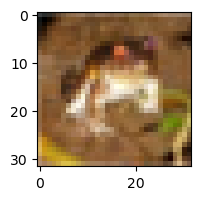

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

In [23]:
classes = ['airplane','automombile','bird','cat','deer','dog','frog','horse','ship','truck']

In [27]:
y_train[0]

array([6], dtype=uint8)

In [28]:
y_train[0][0]

6

In [29]:
y_train = y_train.reshape(-1)

In [30]:
y_train[0]

6

In [24]:
# def plot_sample(x, y, index):
#     plt.figure(figsize=(15,2))
#     plt.imshow(x[index])
#     plt.xlabel(classes[y[index][0]])

In [32]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

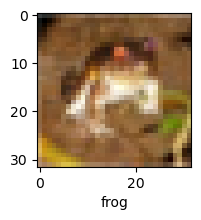

In [33]:
plot_sample(x_train, y_train, 0)

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(x_train, y_train, epochs=5)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 163ms/step - accuracy: 0.2740 - loss: 2.1643
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 163ms/step - accuracy: 0.3951 - loss: 1.6863
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 164ms/step - accuracy: 0.4285 - loss: 1.5897
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 164ms/step - accuracy: 0.4465 - loss: 1.5412
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 164ms/step - accuracy: 0.4638 - loss: 1.5031


In [37]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4553 - loss: 1.5359


[1.5400681495666504, 0.45579999685287476]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report : \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      1000
           1       0.51      0.68      0.58      1000
           2       0.40      0.17      0.24      1000
           3       0.29      0.40      0.34      1000
           4       0.46      0.33      0.38      1000
           5       0.41      0.35      0.38      1000
           6       0.44      0.59      0.50      1000
           7       0.63      0.37      0.46      1000
           8       0.57      0.61      0.59      1000
           9       0.45      0.54      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [43]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.3697 - loss: 1.7290
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5827 - loss: 1.1797
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6383 - loss: 1.0310
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6667 - loss: 0.9518
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6918 - loss: 0.8827


In [44]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6806 - loss: 0.9239


[0.9324400424957275, 0.6797999739646912]

In [45]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [46]:
y_test = y_test.reshape(-1)

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

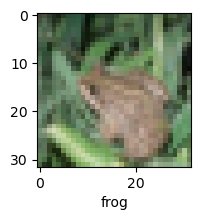

In [52]:
plot_sample(x_test, y_test, 4)

In [53]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [54]:
y_pred[0]

array([0.48064667, 0.18337949, 0.21947864, 0.970418  , 0.15967977,
       0.8904484 , 0.47620374, 0.05786987, 0.72962046, 0.80045843],
      dtype=float32)

In [55]:
np.argmax(y_pred[0])

3

In [56]:
classes[3]

'cat'

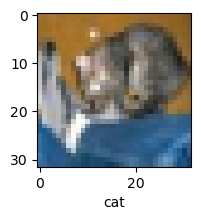

In [57]:
plot_sample(x_test, y_test, 0)

In [58]:
y_test_label = [np.argmax(element) for element in y_pred]

In [59]:
y_test_label[:5]

[3, 1, 8, 0, 4]

In [60]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)